#import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import seaborn as sns
# Load your time series data (replace 'your_data.csv' with the path to your dataset)
data = pd.read_csv('/content/Electricity (1).csv')
electricity_prices = data['SMPEP2'].values



<ipython-input-53-9c0b5e9ca0f2>:12: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Electricity (1).csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [ ]:
data.isnull()


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
38012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [ ]:
data.shape

(37682, 18)

In [ ]:
data.describe

<bound method NDFrame.describe of                DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month

convert float to numeric

In [ ]:
def clean_column(column):


    return column

# Apply the clean_column function to the affected columns
columns_to_clean = ['ForecastWindProduction', 'SMPEA','SystemLoadEA','SystemLoadEP2','ORKWindspeed','CO2Intensity','SMPEP2']  # Replace with the actual column names
for column in columns_to_clean:
    data[column] = clean_column(data[column])

# Fill NaN values with the mean or other appropriate strategies
data.fillna(data.mean(), inplace=True)




<ipython-input-38-1b605ef5b657>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
y = 'SMPEP2'  # Replace with your target variable
x= ['ForecastWindProduction', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']


<ipython-input-57-fd8609c0a50f>:9: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Electricity.csv')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No

Mean Squared Error: 1117747.5000516041


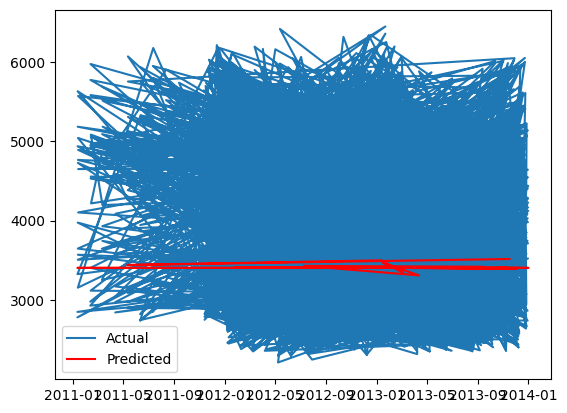

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Electricity.csv')

# Specify the target variable (electricity price) and feature columns
target_variable = 'SystemLoadEA'  # Replace with your target variable
feature_columns = ['ForecastWindProduction', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']

# Keep only the selected columns
data = data[['DateTime', target_variable] + feature_columns]

# Convert 'DateTime' column to datetime data type
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Set 'DateTime' as the index
data.set_index('DateTime', inplace=True)
data[target_variable] = pd.to_numeric(data[target_variable], errors='coerce')

# Define training and testing sets
X = data[feature_columns]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit an ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
start = len(y_train)
end = len(y_train) + len(y_test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Visualize the predictions
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, color='red', label='Predicted')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Electricity.csv")
print(data.head())

           DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00    None            0          1          44    1     11   
1  01/11/2011 00:30    None            0          1          44    1     11   
2  01/11/2011 01:00    None            0          1          44    1     11   
3  01/11/2011 01:30    None            0          1          44    1     11   
4  01/11/2011 02:00    None            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   
2  2011            2                 328.57      3060.71  49.10   
3  2011            3                 335.60      2945.56  48.04   
4  2011            4                 342.90      2849.34  33.75   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.7

<ipython-input-59-e6f04e746724>:3: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Electricity.csv")


<ipython-input-60-c51eeb38dbc7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr(method='pearson')


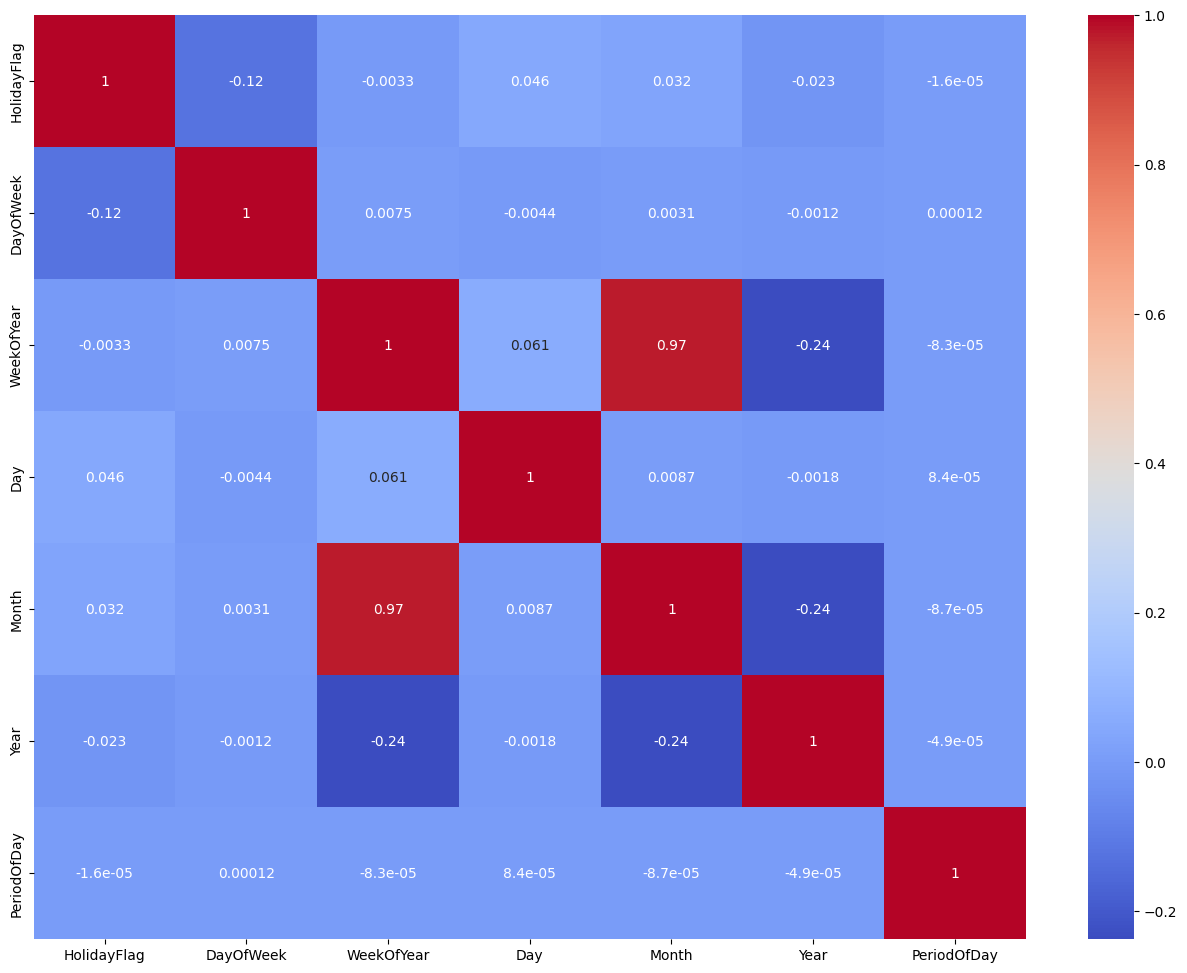

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [ ]:
data = data.dropna()

In [ ]:
x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [ ]:
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([65.9029])